In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import logging

In [2]:
# 1. Logging Setup
logging.basicConfig(filename='store_sales_analysis.log', level=logging.INFO,
                    format='%(asctime)s - %(levelname)s - %(message)s')

logging.info('Loading the dataset...')

In [3]:
store_data = pd.read_csv(r'..\Data\store.csv')
sales_data = pd.read_csv(r'..\Data\train.csv')

C:\Users\eep\AppData\Local\Temp\ipykernel_14792\4154353484.py:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  sales_data = pd.read_csv(r'..\Data\train.csv')


In [4]:
# Merge store and sales data
merged_data = pd.merge(sales_data, store_data, on='Store')

# Convert 'Date' to datetime
merged_data['Date'] = pd.to_datetime(merged_data['Date'])

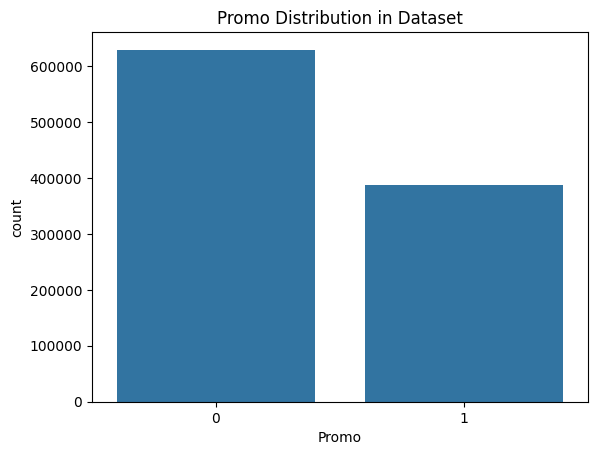

In [5]:
# Check for distribution in promotions
logging.info('Checking promotion distribution...')
sns.countplot(x='Promo', data=merged_data)
plt.title('Promo Distribution in Dataset')
plt.show()


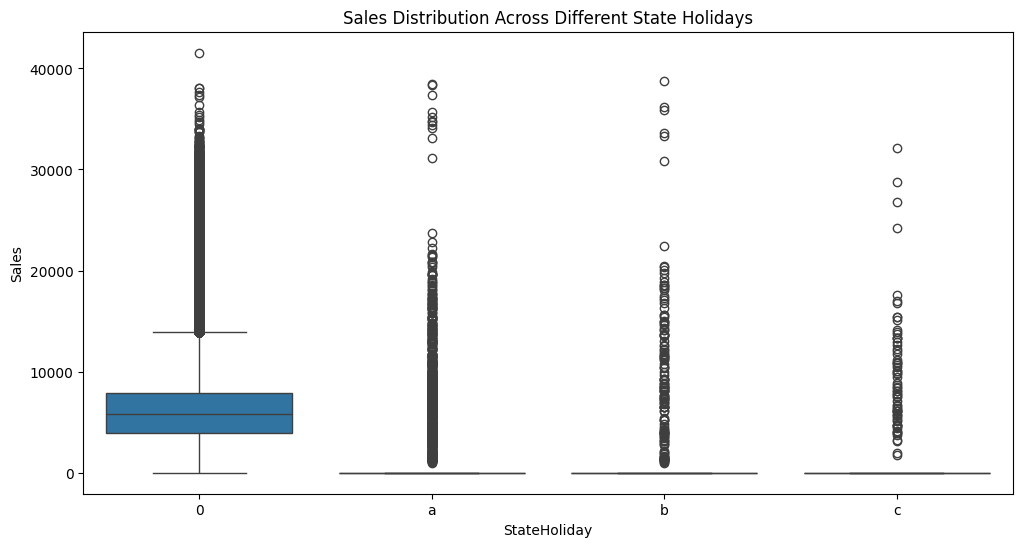

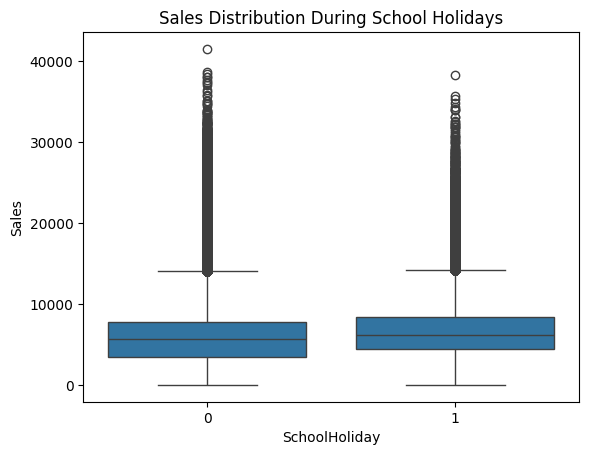

In [6]:
# Sales behavior before, during, and after holidays
logging.info('Analyzing sales behavior during holidays...')
plt.figure(figsize=(12, 6))
sns.boxplot(x='StateHoliday', y='Sales', data=merged_data)
plt.title('Sales Distribution Across Different State Holidays')
plt.show()

# Sales during school holidays
sns.boxplot(x='SchoolHoliday', y='Sales', data=merged_data)
plt.title('Sales Distribution During School Holidays')
plt.show()

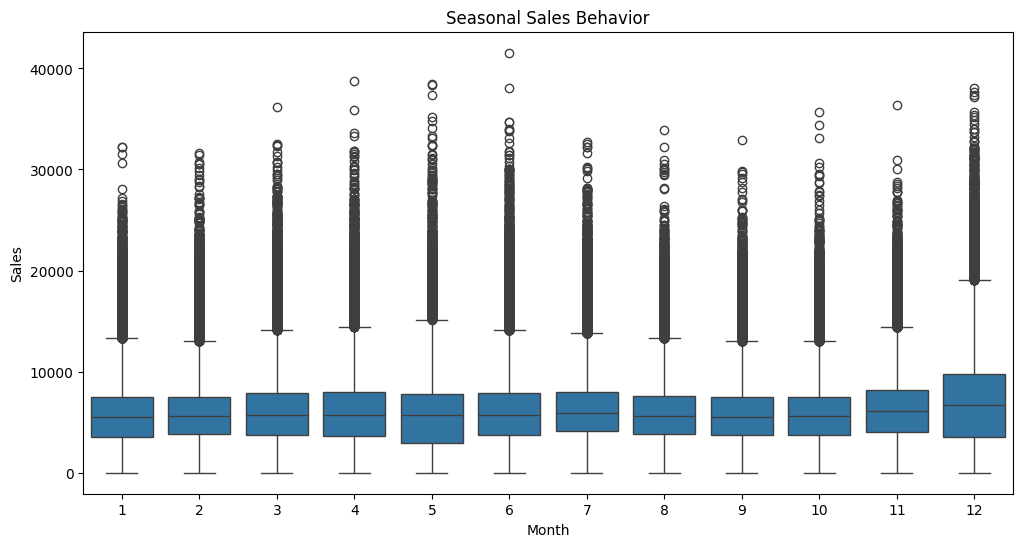

In [7]:
# Seasonal Behavior
merged_data['Month'] = merged_data['Date'].dt.month
plt.figure(figsize=(12, 6))
sns.boxplot(x='Month', y='Sales', data=merged_data)
plt.title('Seasonal Sales Behavior')
plt.show()

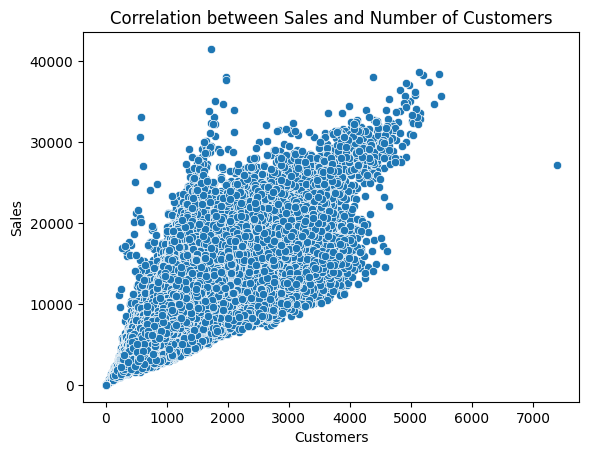

In [8]:
# Correlation between sales and number of customers
logging.info('Checking correlation between sales and customers...')
correlation = merged_data[['Sales', 'Customers']].corr()
logging.info(f"Correlation matrix:\n{correlation}")
sns.scatterplot(x='Customers', y='Sales', data=merged_data)
plt.title('Correlation between Sales and Number of Customers')
plt.show()


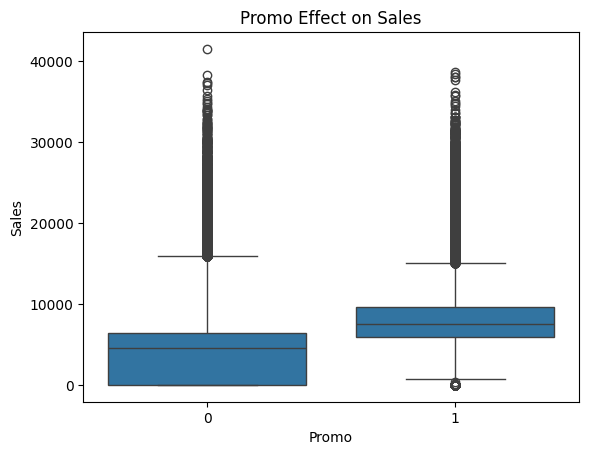

In [9]:
# Promo Effect on Sales
logging.info('Analyzing how promotions affect sales...')
sns.boxplot(x='Promo', y='Sales', data=merged_data)
plt.title('Promo Effect on Sales')
plt.show()

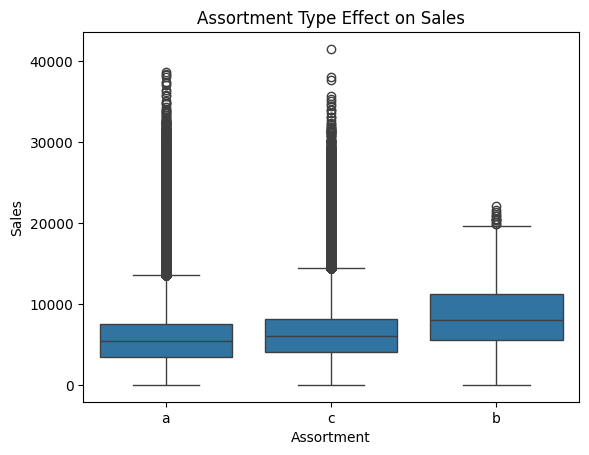

In [10]:
# Assortment Type and Sales
logging.info('Analyzing how assortment types affect sales...')
sns.boxplot(x='Assortment', y='Sales', data=merged_data)
plt.title('Assortment Type Effect on Sales')
plt.show()


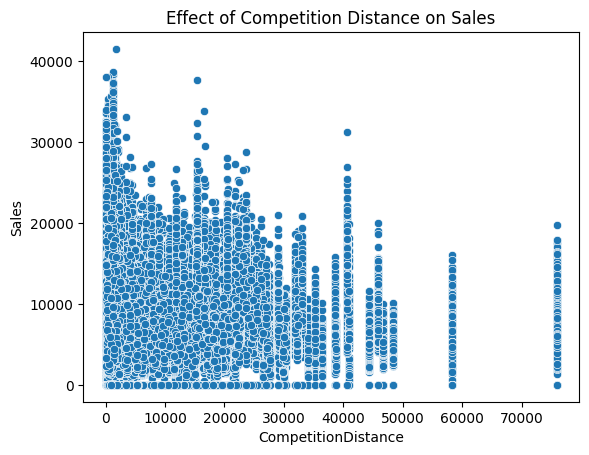

In [11]:

# Distance to Next Competitor and Sales
logging.info('Analyzing effect of competitor distance on sales...')
sns.scatterplot(x='CompetitionDistance', y='Sales', data=merged_data)
plt.title('Effect of Competition Distance on Sales')
plt.show()

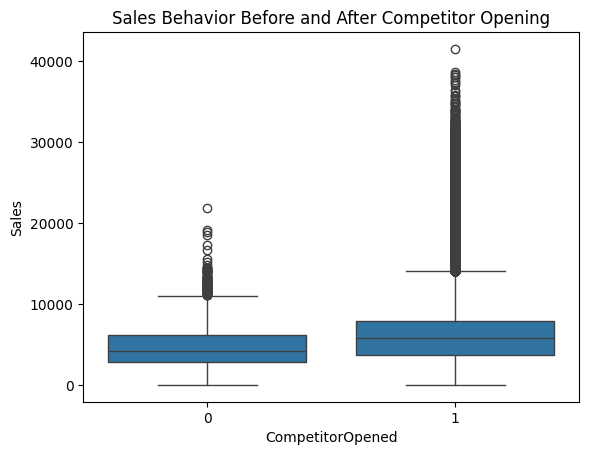

In [12]:
#  Competitor Reopening Effect
logging.info('Analyzing effect of competitor reopening on sales...')
merged_data['CompetitorOpened'] = np.where(merged_data['CompetitionDistance'].isna(), 0, 1)
sns.boxplot(x='CompetitorOpened', y='Sales', data=merged_data)
plt.title('Sales Behavior Before and After Competitor Opening')
plt.show()

logging.info('Exploratory Data Analysis Completed.')

In [13]:
# Check for missing values in 'Promo'
if merged_data['Promo'].isnull().sum() > 0:
    logging.warning(f"Missing values found in 'Promo': {merged_data['Promo'].isnull().sum()}")
    merged_data['Promo'].fillna(0, inplace=True)

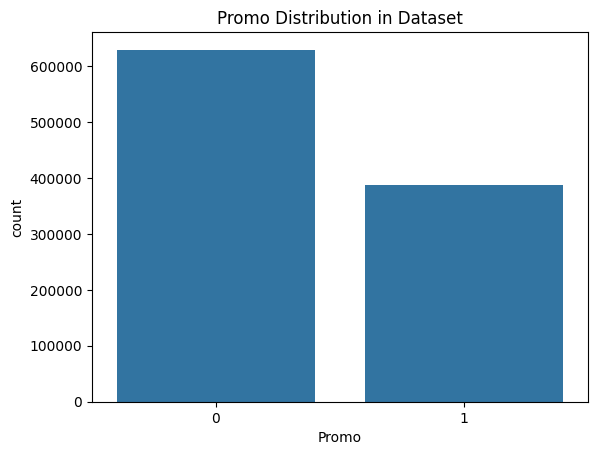

In [14]:
# Check for distribution in promotions
logging.info('Checking promotion distribution in dataset...')
sns.countplot(x='Promo', data=merged_data)
plt.title('Promo Distribution in Dataset')
plt.show()


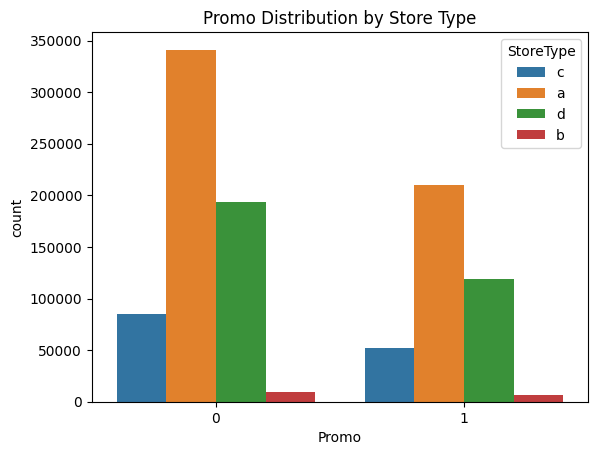

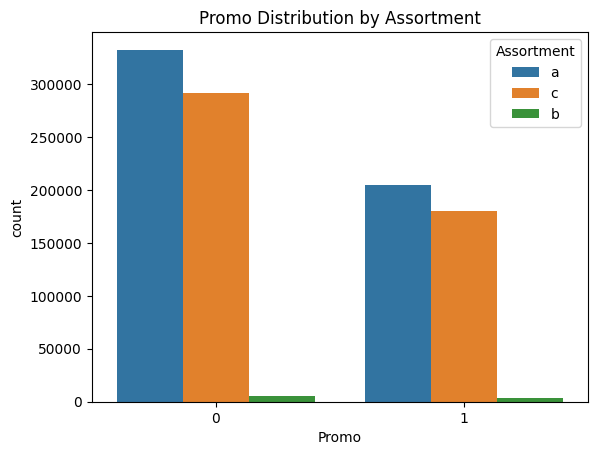

In [15]:
# Promo distribution across different store types
sns.countplot(x='Promo', hue='StoreType', data=merged_data)
plt.title('Promo Distribution by Store Type')
plt.show()

# Promo distribution across different assortment types
sns.countplot(x='Promo', hue='Assortment', data=merged_data)
plt.title('Promo Distribution by Assortment')
plt.show()

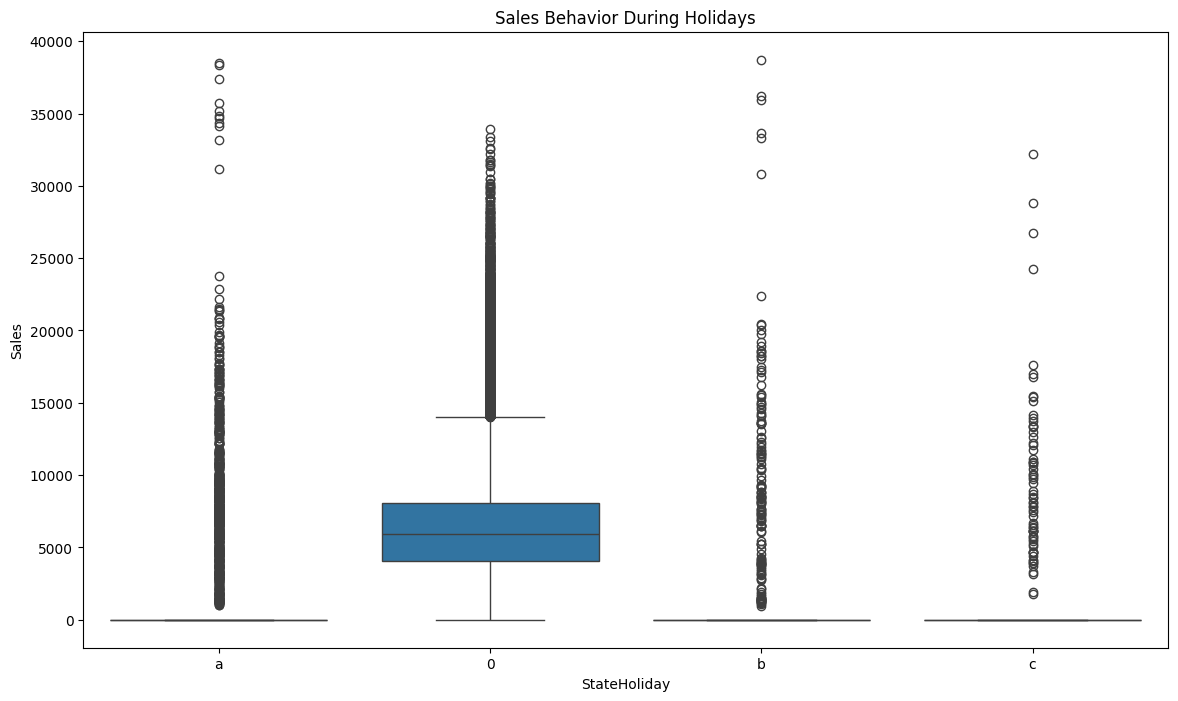

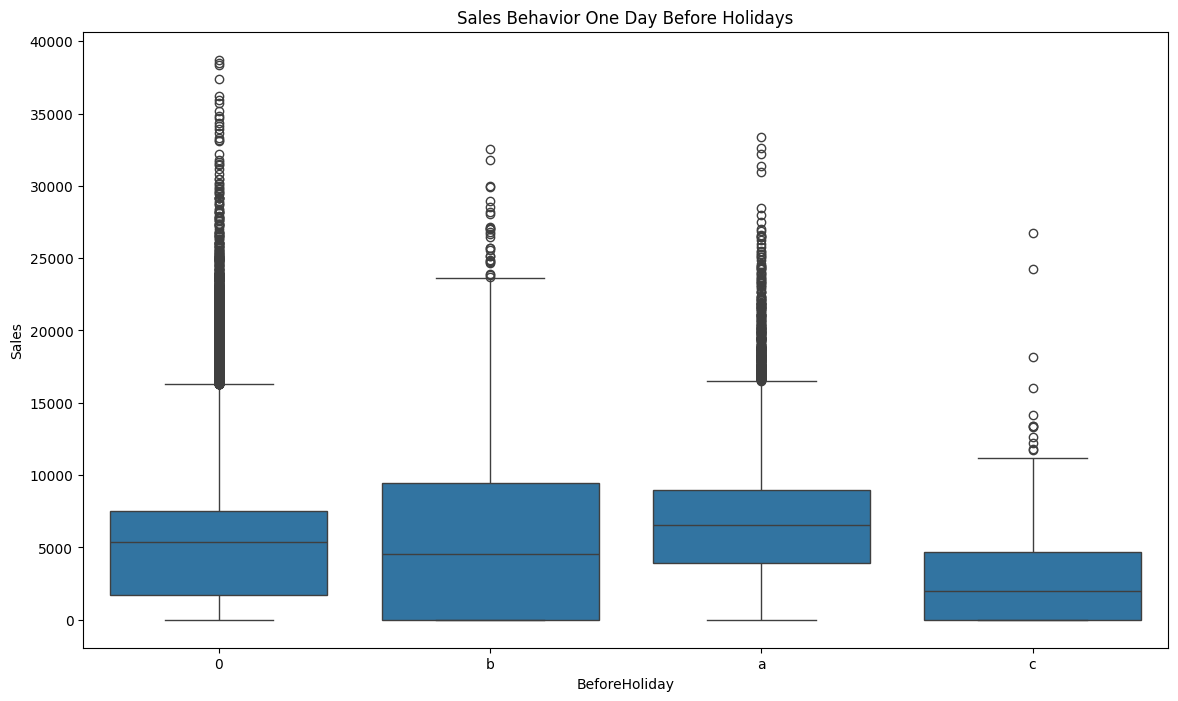

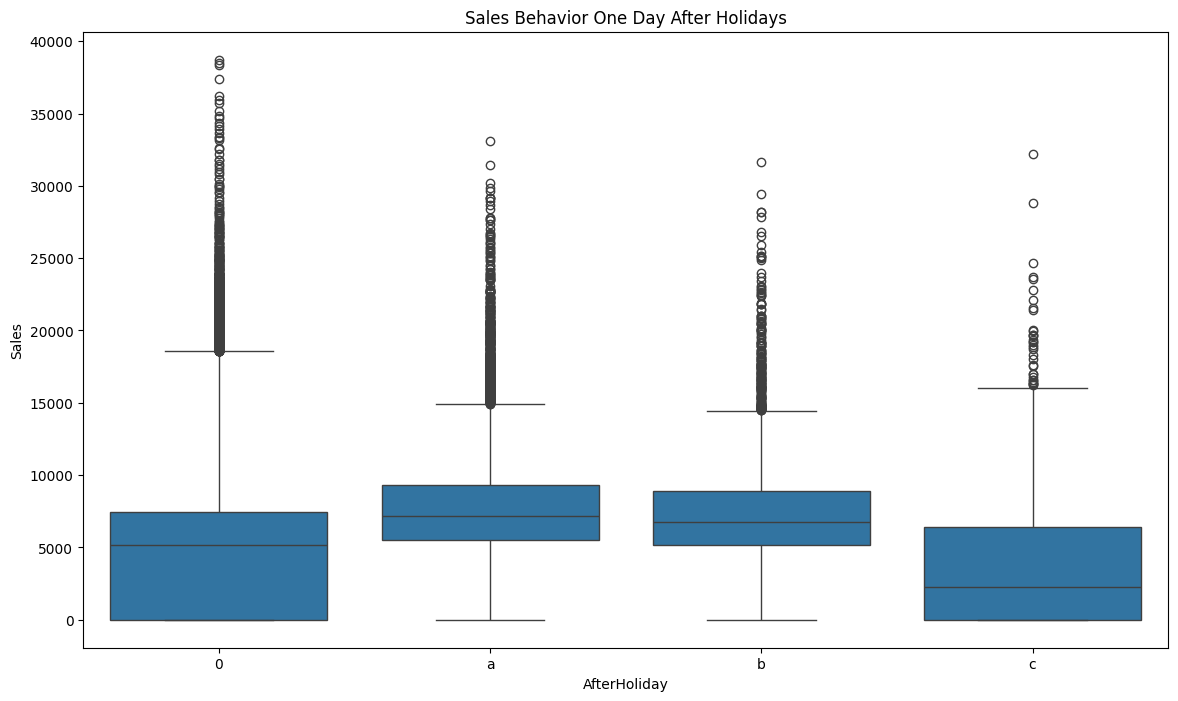

In [16]:
#Classifying Before, During, and After Holidays:
# Convert Date to datetime if not already done
merged_data['Date'] = pd.to_datetime(merged_data['Date'])

# Sort by Date and Store for easier analysis
merged_data = merged_data.sort_values(by=['Store', 'Date'])

# Define 'BeforeHoliday' and 'AfterHoliday' features
merged_data['BeforeHoliday'] = merged_data['StateHoliday'].shift(-1).fillna('0')
merged_data['AfterHoliday'] = merged_data['StateHoliday'].shift(1).fillna('0')

# Filter data for relevant sales periods (Before, During, After)
before_during_after = merged_data[(merged_data['StateHoliday'] != '0') | 
                                  (merged_data['BeforeHoliday'] != '0') | 
                                  (merged_data['AfterHoliday'] != '0')]

# 2. Plotting Sales Behavior Before, During, and After Holidays
plt.figure(figsize=(14, 8))
sns.boxplot(x='StateHoliday', y='Sales', data=before_during_after)
plt.title('Sales Behavior During Holidays')
plt.show()

# Sales behavior one day before and after holidays
plt.figure(figsize=(14, 8))
sns.boxplot(x='BeforeHoliday', y='Sales', data=before_during_after)
plt.title('Sales Behavior One Day Before Holidays')
plt.show()

plt.figure(figsize=(14, 8))
sns.boxplot(x='AfterHoliday', y='Sales', data=before_during_after)
plt.title('Sales Behavior One Day After Holidays')
plt.show()


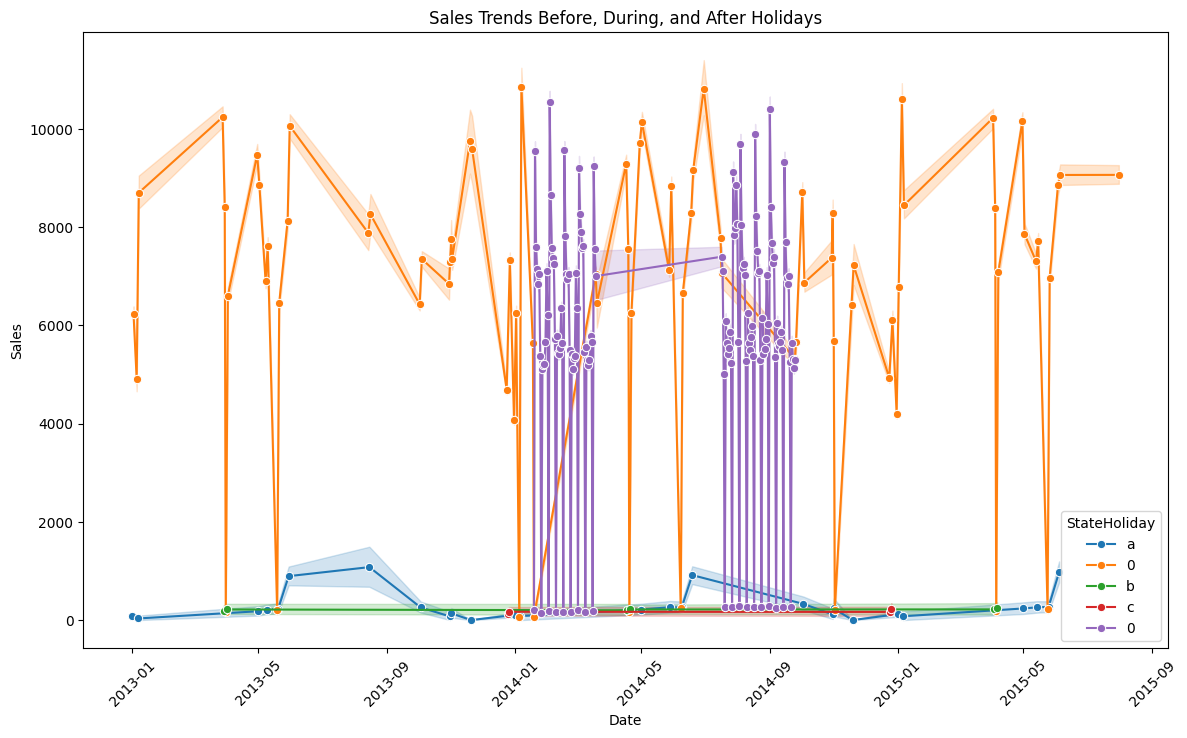

In [17]:
# Visualize Trends with Line Plots
# Sales trends before, during, and after holidays using a line plot
plt.figure(figsize=(14, 8))
sns.lineplot(x='Date', y='Sales', hue='StateHoliday', data=before_during_after, marker='o')
plt.title('Sales Trends Before, During, and After Holidays')
plt.xticks(rotation=45)
plt.show()

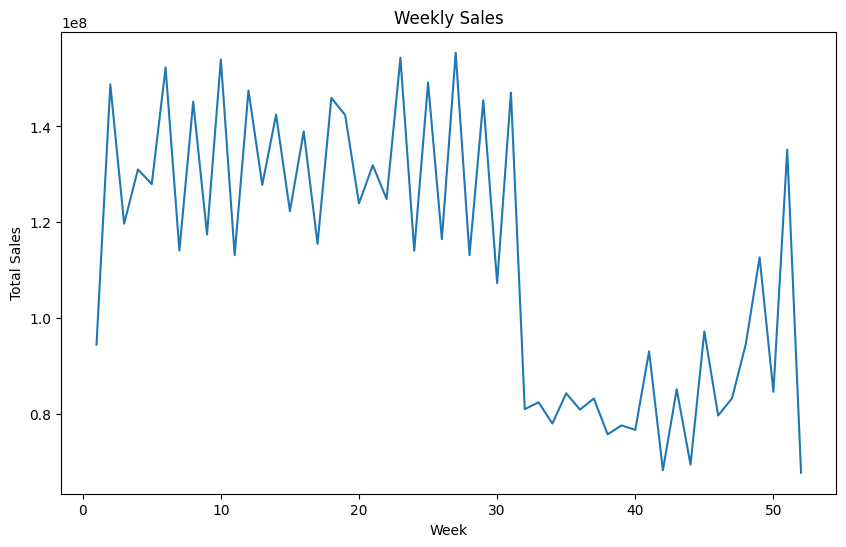

In [18]:
#Plotting Weekly Sales
# Ensure the date column is in datetime format
merged_data['Date'] = pd.to_datetime(merged_data['Date'])

# Extract the week from the date
merged_data['Week'] = merged_data['Date'].dt.isocalendar().week

# Group by week and calculate the total sales for each week
weekly_sales = merged_data.groupby('Week')['Sales'].sum().reset_index()

# Plot weekly sales
plt.figure(figsize=(10,6))
sns.lineplot(data=weekly_sales, x='Week', y='Sales')
plt.title('Weekly Sales')
plt.xlabel('Week')
plt.ylabel('Total Sales')
plt.show()

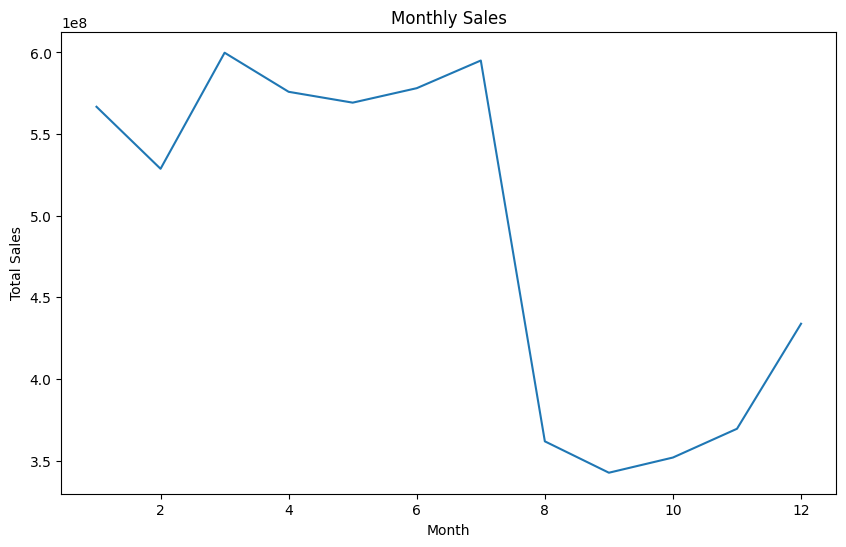

In [19]:
#Plotting Monthly Sales
# Extract the month from the date
merged_data['Month'] = merged_data['Date'].dt.month

# Group by month and calculate the total sales for each month
monthly_sales = merged_data.groupby('Month')['Sales'].sum().reset_index()

# Plot monthly sales
plt.figure(figsize=(10,6))
sns.lineplot(data=monthly_sales, x='Month', y='Sales')
plt.title('Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()

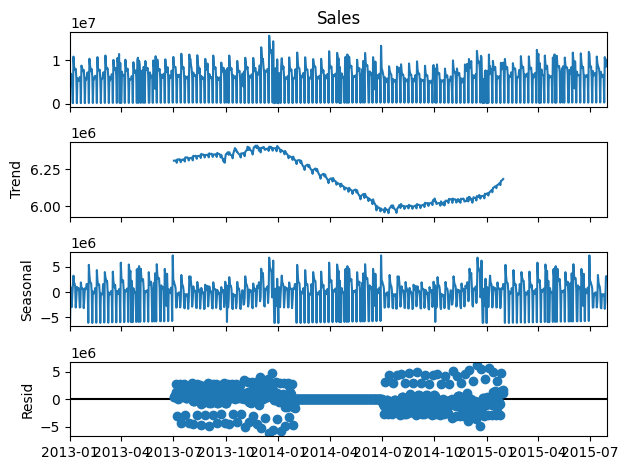

In [20]:
#Seasonal Decomposition
from statsmodels.tsa.seasonal import seasonal_decompose

# Set the Date column as the index for time series analysis
merged_data.set_index('Date', inplace=True)

# Resample the sales data by day to handle any missing dates
daily_sales = merged_data['Sales'].resample('D').sum()

# Perform seasonal decomposition
decomposition = seasonal_decompose(daily_sales, model='additive', period=365)  # period = 365 for yearly seasonality

# Plot the decomposition
decomposition.plot()
plt.show()

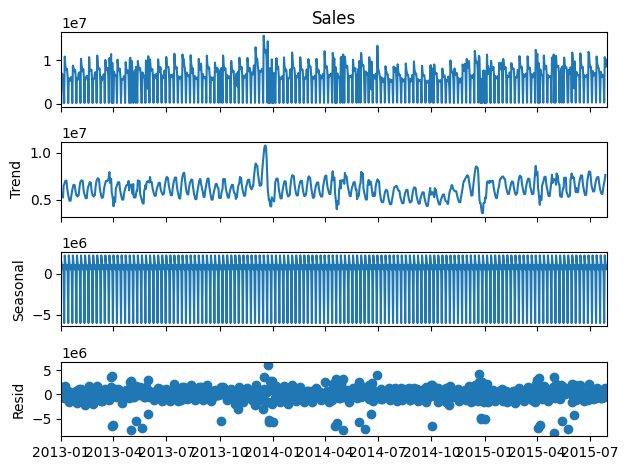

In [56]:
#Anomaly Detection Seasonal Decomposition: Decompose the time series data into trend, seasonal, and residual components to detect anomalies.
from statsmodels.tsa.seasonal import seasonal_decompose

# Ensure Date is the index
daily_sales.set_index('Date', inplace=True)

decomposition = seasonal_decompose(daily_sales['Sales'], model='additive')
fig = decomposition.plot()
plt.show()


C:\Users\eep\AppData\Local\Temp\ipykernel_14792\3164651333.py:4: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  sales_data = pd.read_csv(r'..\Data\train.csv')
C:\Users\eep\AppData\Local\Temp\ipykernel_14792\3164651333.py:16: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = merged_data.resample('M', on='Date')['Sales'].sum()


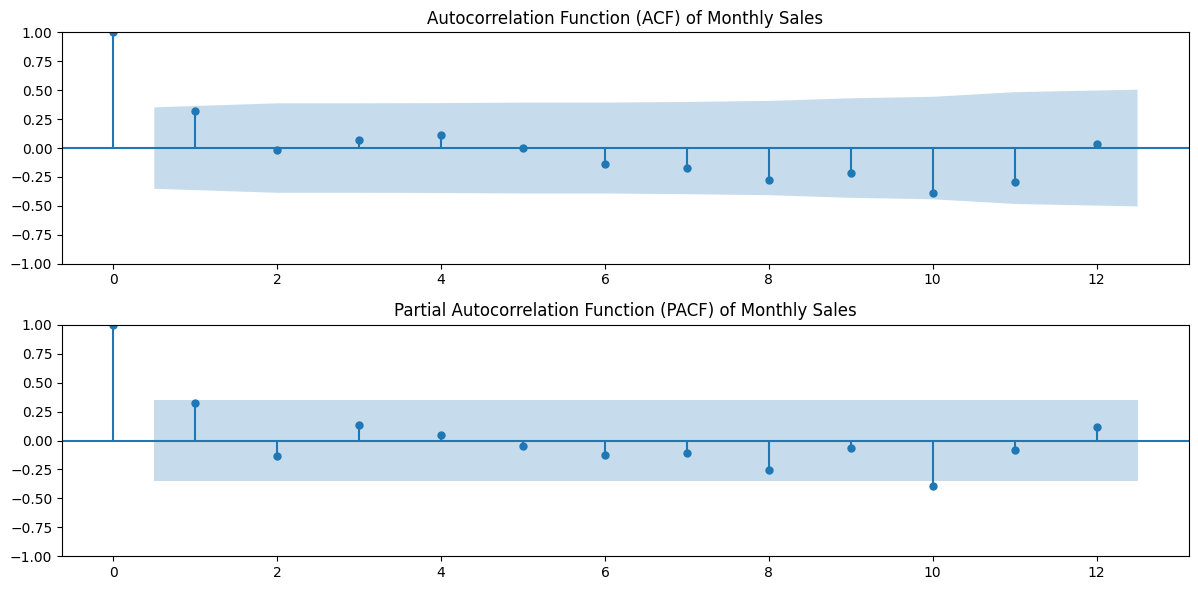

In [21]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Reload the sales data to ensure 'Date' column is present
sales_data = pd.read_csv(r'..\Data\train.csv')

# Check if 'Date' column is present and convert to datetime if needed
if 'Date' in sales_data.columns:
    sales_data['Date'] = pd.to_datetime(sales_data['Date'])
else:
    raise KeyError("The 'Date' column is missing from the dataset.")

# Merge sales and store data again to make sure 'Date' is in the merged dataset
merged_data = pd.merge(sales_data, store_data, on='Store')

# Resample the data to monthly frequency by summing the sales
monthly_sales = merged_data.resample('M', on='Date')['Sales'].sum()

# Plot ACF and PACF for the monthly sales data
plt.figure(figsize=(12, 6))

# Autocorrelation Function (ACF)
plt.subplot(211)
plot_acf(monthly_sales.dropna(), lags=12, ax=plt.gca())
plt.title('Autocorrelation Function (ACF) of Monthly Sales')

# Partial Autocorrelation Function (PACF)
plt.subplot(212)
plot_pacf(monthly_sales.dropna(), lags=12, ax=plt.gca())
plt.title('Partial Autocorrelation Function (PACF) of Monthly Sales')

plt.tight_layout()
plt.show()

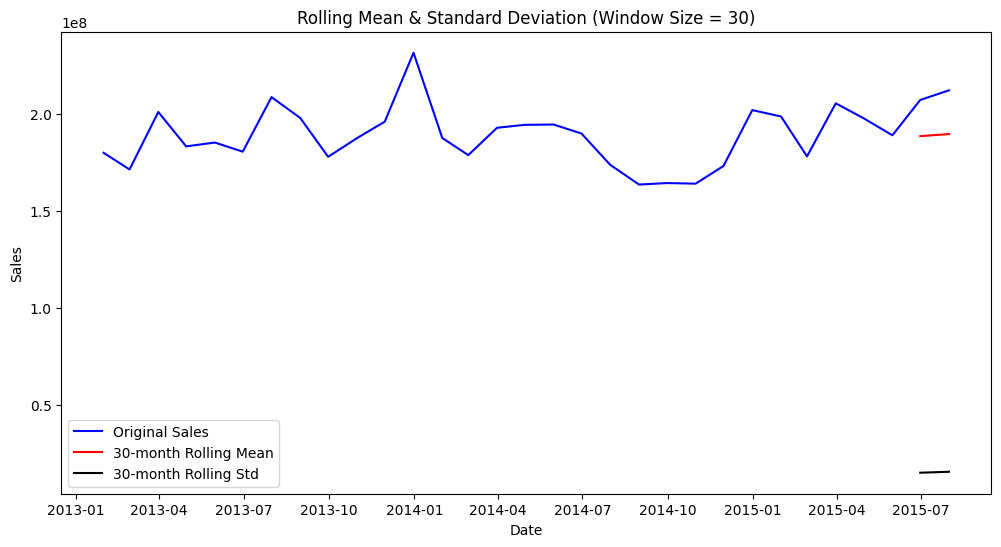

In [22]:
# Convert index to datetime if needed (you've confirmed that the index is already datetime)
# monthly_sales.index = pd.to_datetime(monthly_sales.index)

# Ensure 'Sales' column is numeric
monthly_sales = monthly_sales.to_frame()  # Convert Series to DataFrame if needed
monthly_sales['Sales'] = pd.to_numeric(monthly_sales['Sales'], errors='coerce')

# Choose a window size (e.g., 30 months for rolling statistics)
window_size = 30

# Calculate rolling mean and standard deviation
rolling_mean = monthly_sales['Sales'].rolling(window=window_size).mean()
rolling_std = monthly_sales['Sales'].rolling(window=window_size).std()

# Plot the rolling statistics
plt.figure(figsize=(12,6))
plt.plot(monthly_sales.index, monthly_sales['Sales'], color='blue', label='Original Sales')
plt.plot(rolling_mean.index, rolling_mean, color='red', label=f'{window_size}-month Rolling Mean')
plt.plot(rolling_std.index, rolling_std, color='black', label=f'{window_size}-month Rolling Std')

# Add titles and labels
plt.title(f'Rolling Mean & Standard Deviation (Window Size = {window_size})')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend(loc='best')
plt.show()

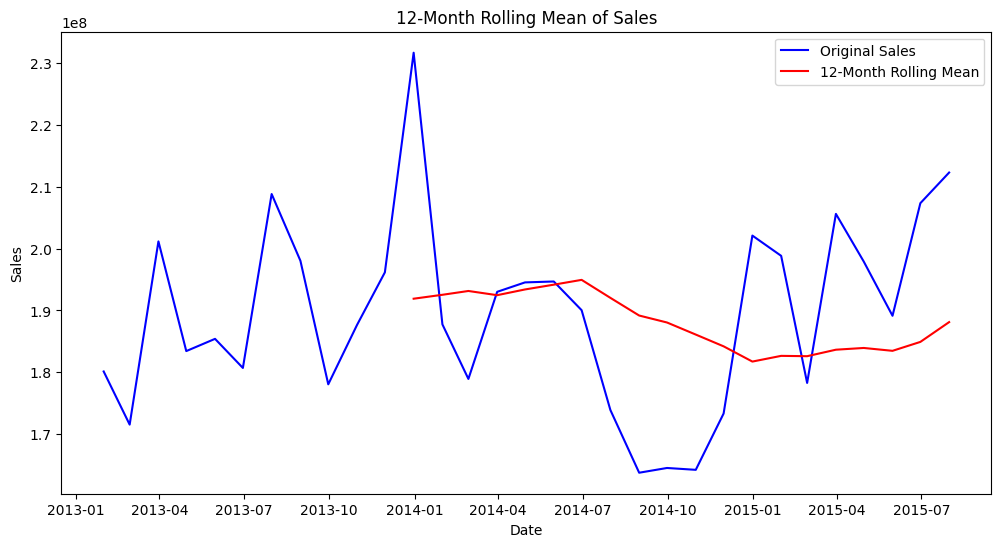

In [28]:
# Ensure 'Sales' column is numeric
monthly_sales['Sales'] = pd.to_numeric(monthly_sales['Sales'], errors='coerce')

# Choose a window size for 12 months
window_size = 12  # 12 months rolling window

# Calculate rolling mean
rolling_mean_12m = monthly_sales['Sales'].rolling(window=window_size).mean()

# Plot the original sales and 12-month rolling mean
plt.figure(figsize=(12,6))
plt.plot(monthly_sales['Sales'], color='blue', label='Original Sales')
plt.plot(rolling_mean_12m, color='red', label='12-Month Rolling Mean')

# Add titles and labels
plt.title('12-Month Rolling Mean of Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend(loc='best')
plt.show()

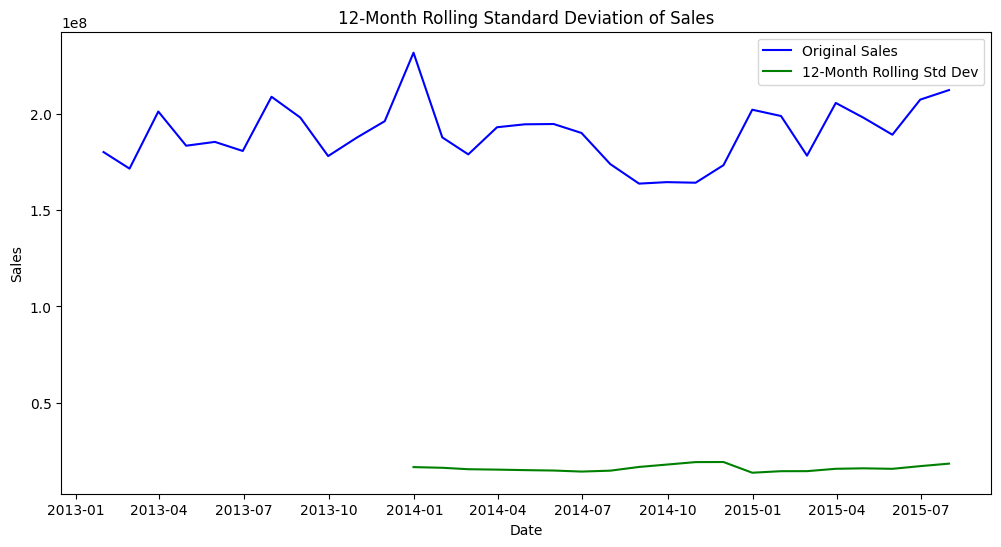

In [29]:
# Month Rolling Standard Deviation
# Ensure 'Sales' column is numeric
monthly_sales['Sales'] = pd.to_numeric(monthly_sales['Sales'], errors='coerce')

# Calculate the 12-month rolling standard deviation
monthly_sales['12M_Rolling_Std'] = monthly_sales['Sales'].rolling(window=12).std()

# Plot the original sales and 12-month rolling standard deviation
plt.figure(figsize=(12,6))
plt.plot(monthly_sales['Sales'], color='blue', label='Original Sales')
plt.plot(monthly_sales['12M_Rolling_Std'], color='green', label='12-Month Rolling Std Dev')

# Add titles and labels
plt.title('12-Month Rolling Standard Deviation of Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend(loc='best')
plt.show()

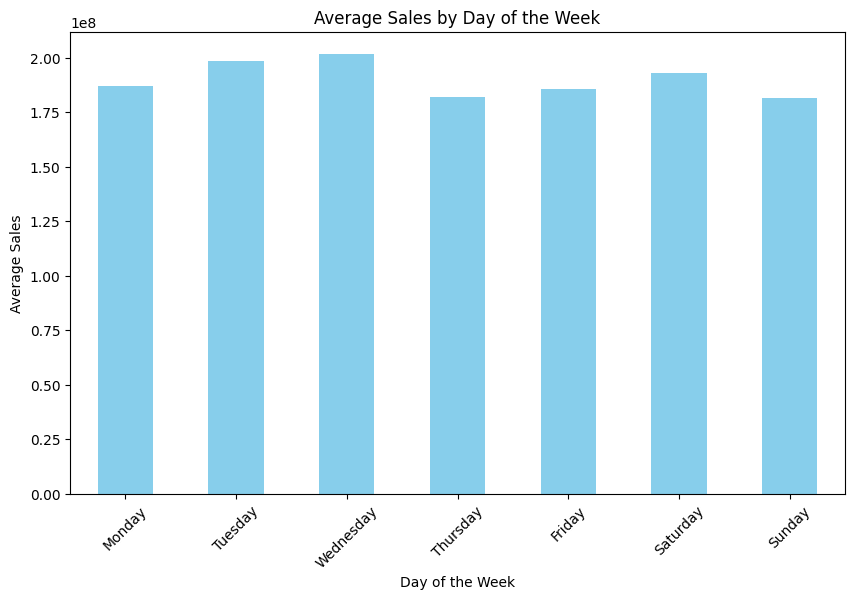

In [30]:
# Average Sales by Day of the Week
# # Make sure 'Date' is a datetime index
monthly_sales['Date'] = pd.to_datetime(monthly_sales.index)

# Extract day of the week from the 'Date' column
monthly_sales['Day_of_Week'] = monthly_sales['Date'].dt.day_name()

# Calculate average sales by day of the week
avg_sales_by_day = monthly_sales.groupby('Day_of_Week')['Sales'].mean()

# Plot the average sales by day of the week
plt.figure(figsize=(10, 6))
avg_sales_by_day = avg_sales_by_day.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
avg_sales_by_day.plot(kind='bar', color='skyblue')
plt.title('Average Sales by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Sales')
plt.xticks(rotation=45)
plt.show()

In [31]:
#  Holiday Column

# Example list of holiday dates (Replace with your actual list of holidays)
holiday_dates = pd.to_datetime([
    '2013-01-01', '2013-12-25', '2013-07-04', # Add all relevant holiday dates here
])

# Ensure 'Date' column is in datetime format
sales_data['Date'] = pd.to_datetime(sales_data['Date'])

# Create the 'Holiday' column
sales_data['Holiday'] = sales_data['Date'].isin(holiday_dates)

# Display the updated DataFrame to verify
print(sales_data.head())


   Store  DayOfWeek       Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          5 2015-07-31   5263        555     1      1            0   
1      2          5 2015-07-31   6064        625     1      1            0   
2      3          5 2015-07-31   8314        821     1      1            0   
3      4          5 2015-07-31  13995       1498     1      1            0   
4      5          5 2015-07-31   4822        559     1      1            0   

   SchoolHoliday  Holiday  
0              1    False  
1              1    False  
2              1    False  
3              1    False  
4              1    False  


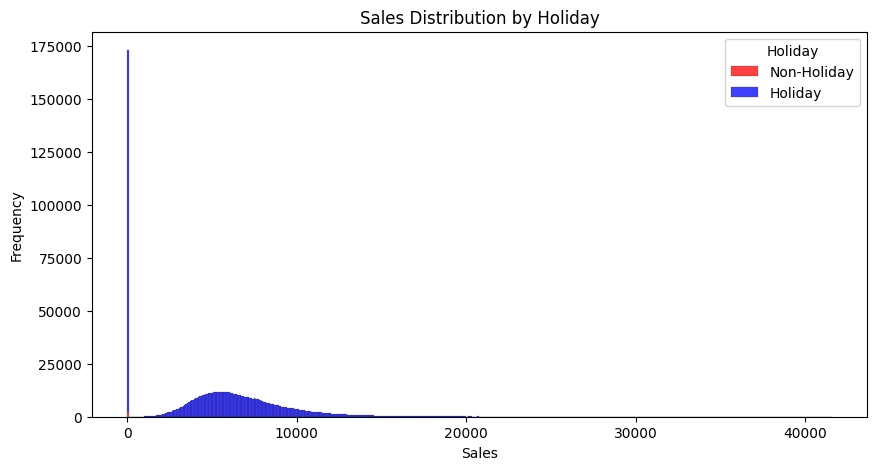

In [32]:
# Plot the distribution of sales for holidays vs non-holidays
plt.figure(figsize=(10, 5))
sns.histplot(data=sales_data, x='Sales', hue='Holiday', multiple='stack', palette={True: 'red', False: 'blue'})
plt.title('Sales Distribution by Holiday')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.legend(title='Holiday', labels=['Non-Holiday', 'Holiday'])
plt.show()

In [33]:
# Print summary statistics for 'Sales' and 'Customers'
print(sales_data[['Sales', 'Customers']].describe())


              Sales     Customers
count  1.017209e+06  1.017209e+06
mean   5.773819e+03  6.331459e+02
std    3.849926e+03  4.644117e+02
min    0.000000e+00  0.000000e+00
25%    3.727000e+03  4.050000e+02
50%    5.744000e+03  6.090000e+02
75%    7.856000e+03  8.370000e+02
max    4.155100e+04  7.388000e+03


In [34]:

# Holiday Effect
from scipy.stats import ttest_ind

# Assuming sales_data['Holiday'] is a boolean column indicating holidays

# Sales on holidays
holiday_sales = sales_data[sales_data['Holiday'] == True]['Sales']

# Sales on non-holidays
non_holiday_sales = sales_data[sales_data['Holiday'] == False]['Sales']

# Perform the t-test
t_stat, p_value = ttest_ind(holiday_sales, non_holiday_sales)

# Print results
print('T-statistic:', t_stat)
print('P-value:', p_value)


T-statistic: -47.78717704943702
P-value: 0.0


In [35]:
# Effect Over Time

# Assuming 'Promo' is a binary indicator for promotions
promo_sales = sales_data[sales_data['Promo'] == 1]['Sales']
non_promo_sales = sales_data[sales_data['Promo'] == 0]['Sales']

t_stat_promo, p_value_promo = ttest_ind(promo_sales, non_promo_sales)
print('Promo Effect T-statistic:', t_stat_promo, 'P-value:', p_value_promo)

Promo Effect T-statistic: 511.54718673163774 P-value: 0.0


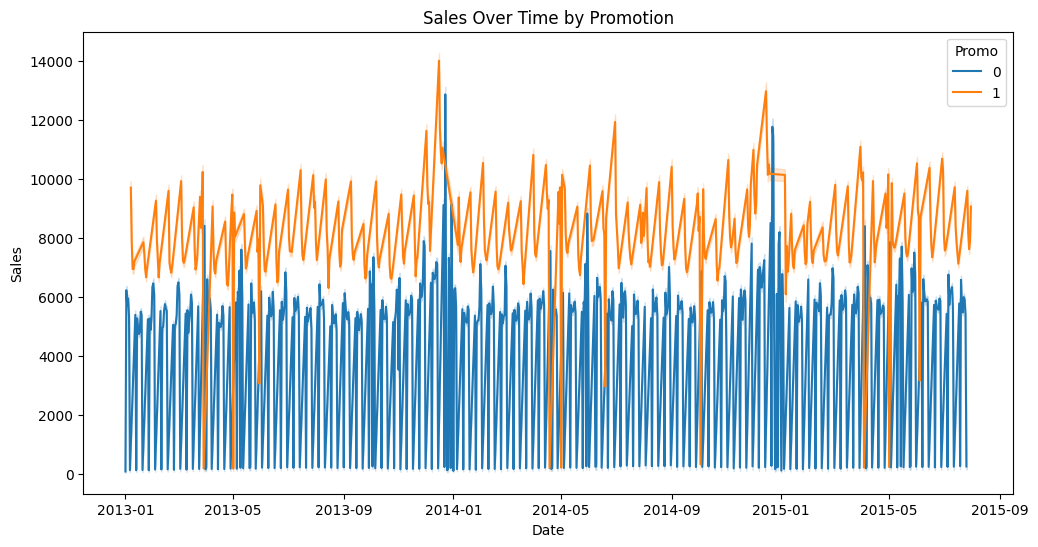

In [36]:
# Visualize the effect of promotions over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Sales', hue='Promo', data=sales_data)
plt.title('Sales Over Time by Promotion')
plt.show()


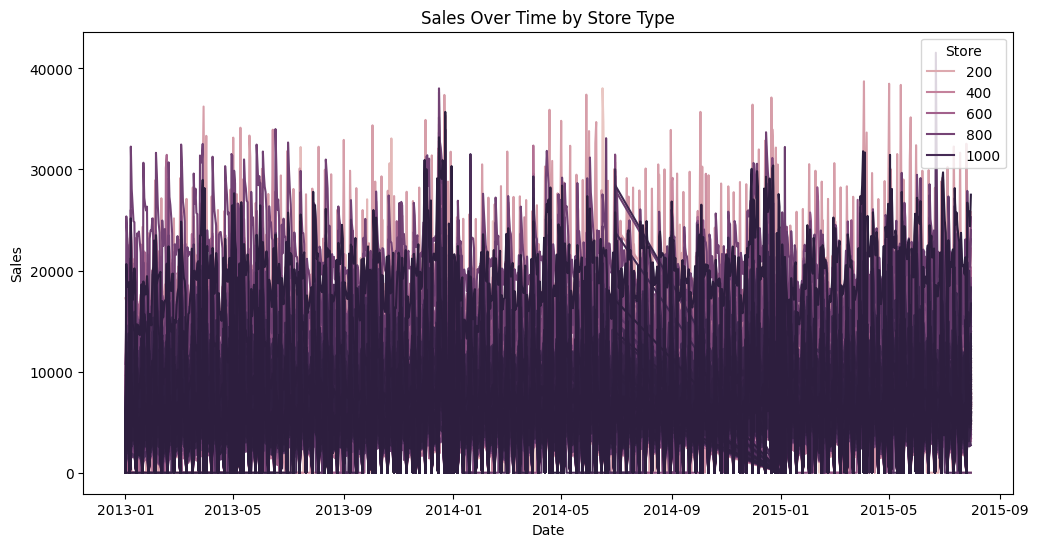

In [37]:
# Store needs to be visualized
if 'Store' in sales_data.columns:
    plt.figure(figsize=(12, 6))
    sns.lineplot(x='Date', y='Sales', hue='Store', data=sales_data)
    plt.title('Sales Over Time by Store Type')
    plt.show()
else:
    print("Store column not found in sales_data DataFrame.")

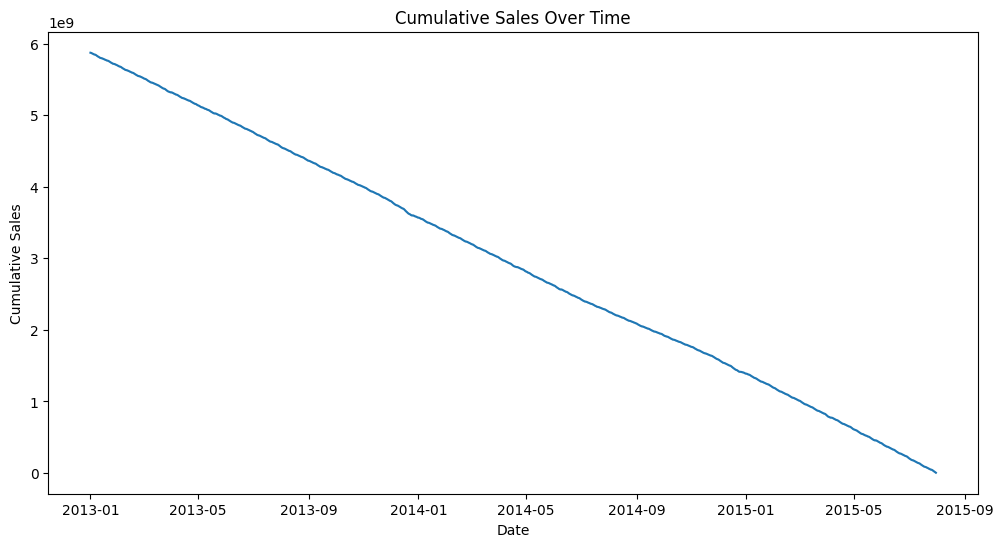

In [38]:
# Cumulative Sales Over Time
sales_data['Cumulative_Sales'] = sales_data['Sales'].cumsum()

# Plot cumulative sales over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Cumulative_Sales', data=sales_data)
plt.title('Cumulative Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Cumulative Sales')
plt.show()


              Sales  Customers     Promo   Holiday
Sales      1.000000   0.894711  0.452345 -0.047328
Customers  0.894711   1.000000  0.316169 -0.043023
Promo      0.452345   0.316169  1.000000 -0.005685
Holiday   -0.047328  -0.043023 -0.005685  1.000000


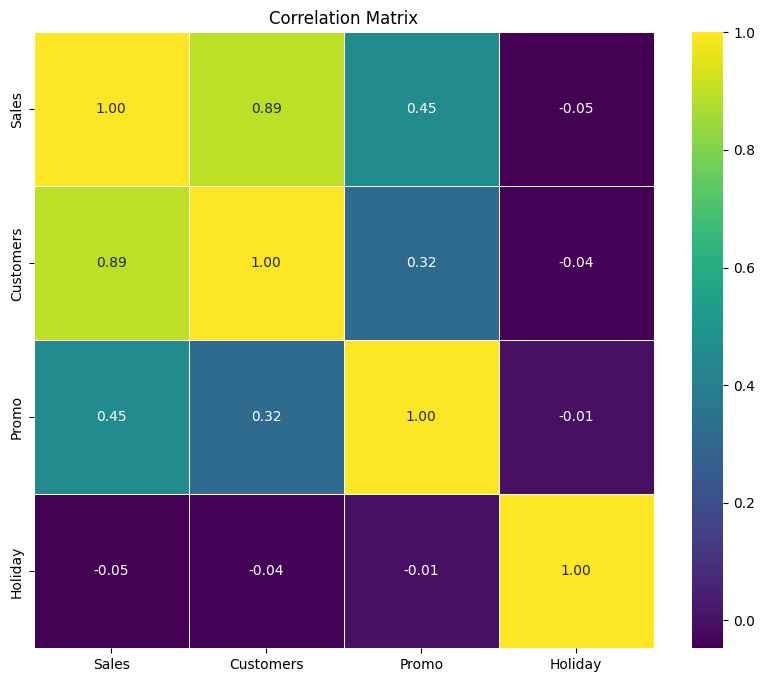

In [39]:
# Compute correlation matrix
correlation_matrix = sales_data[['Sales', 'Customers', 'Promo', 'Holiday']].corr()
print(correlation_matrix)

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [42]:

# Add 'Sales_Log' column
sales_data['Sales_Log'] = sales_data['Sales'].apply(lambda x: np.log(x + 1) if x > 0 else 0)


           Sales_Log  Customers     Promo   Holiday
Sales_Log   1.000000   0.682308  0.337111 -0.073432
Customers   0.682308   1.000000  0.316169 -0.043023
Promo       0.337111   0.316169  1.000000 -0.005685
Holiday    -0.073432  -0.043023 -0.005685  1.000000


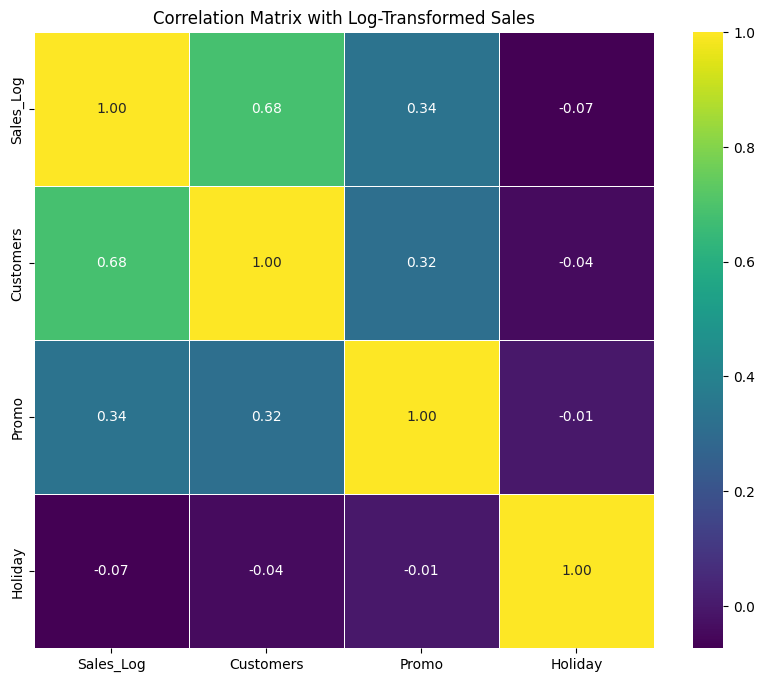

In [44]:
#Correlation Analysis After Transformation: If you plan to analyze correlations after the log transformation, update the correlation calculation:

# Compute correlation matrix including log-transformed Sales
correlation_matrix = sales_data[['Sales_Log', 'Customers', 'Promo', 'Holiday']].corr()

# Print the correlation matrix
print(correlation_matrix)

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix with Log-Transformed Sales')
plt.show()



In [50]:
# Convert relevant columns to numeric, forcing errors to NaN (if needed)
sales_data['Sales'] = pd.to_numeric(sales_data['Sales'], errors='coerce')
sales_data['Customers'] = pd.to_numeric(sales_data['Customers'], errors='coerce')
sales_data['Open'] = pd.to_numeric(sales_data['Open'], errors='coerce')
sales_data['Promo'] = pd.to_numeric(sales_data['Promo'], errors='coerce')
sales_data['StateHoliday'] = pd.to_numeric(sales_data['StateHoliday'], errors='coerce')
sales_data['SchoolHoliday'] = pd.to_numeric(sales_data['SchoolHoliday'], errors='coerce')
sales_data['Sales_Log'] = pd.to_numeric(sales_data['Sales_Log'], errors='coerce')

# Aggregate sales data by date
daily_sales = sales_data.groupby('Date').agg({
    'Sales': 'sum',
    'Customers': 'sum',
    'Open': 'mean',
    'Promo': 'mean',
    'StateHoliday': 'mean',
    'SchoolHoliday': 'mean',
    'Sales_Log': 'mean',
    'Holiday': 'mean'
}).reset_index()

# Print the first few rows of the aggregated data
print(daily_sales.head())


        Date    Sales  Customers      Open  Promo  StateHoliday  \
0 2013-01-01    97235      19491  0.015260    0.0           NaN   
1 2013-01-02  6949829     834075  0.996413    0.0           0.0   
2 2013-01-03  6347820     761040  0.994619    0.0           0.0   
3 2013-01-04  6638954     782137  0.993722    0.0           0.0   
4 2013-01-05  5951593     687472  0.992825    0.0           0.0   

   SchoolHoliday  Sales_Log  Holiday  
0       1.000000   0.129461      1.0  
1       1.000000   8.635560      0.0  
2       0.932735   8.535310      0.0  
3       0.932735   8.580564      0.0  
4       0.100448   8.415379      0.0  


           Sales_Log  Customers     Promo   Holiday
Sales_Log   1.000000   0.682308  0.337111 -0.073432
Customers   0.682308   1.000000  0.316169 -0.043023
Promo       0.337111   0.316169  1.000000 -0.005685
Holiday    -0.073432  -0.043023 -0.005685  1.000000


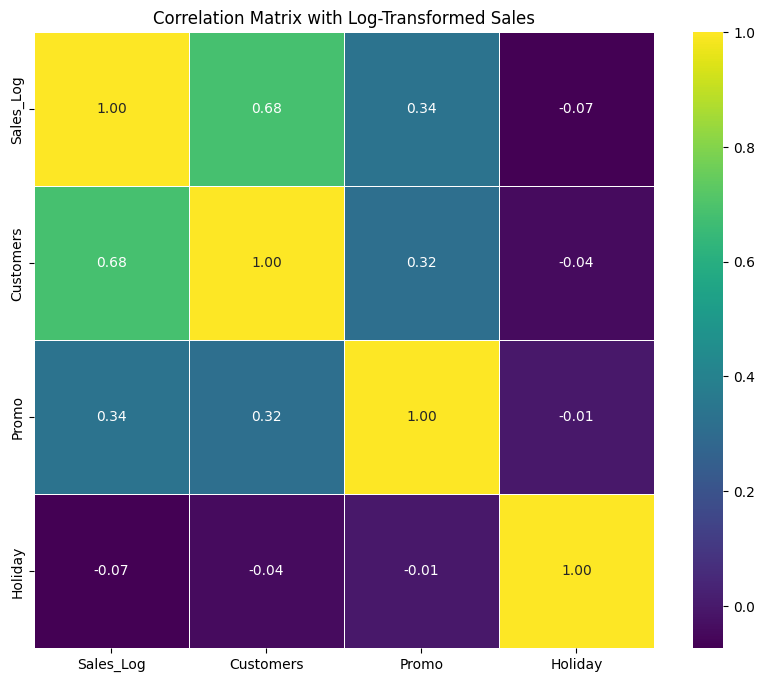

In [51]:
#Correlation Analysis After Transformation: If you plan to analyze correlations after the log transformation, update the correlation calculation:

# Compute correlation matrix including log-transformed Sales
correlation_matrix = sales_data[['Sales_Log', 'Customers', 'Promo', 'Holiday']].corr()
print(correlation_matrix)

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix with Log-Transformed Sales')
plt.show()


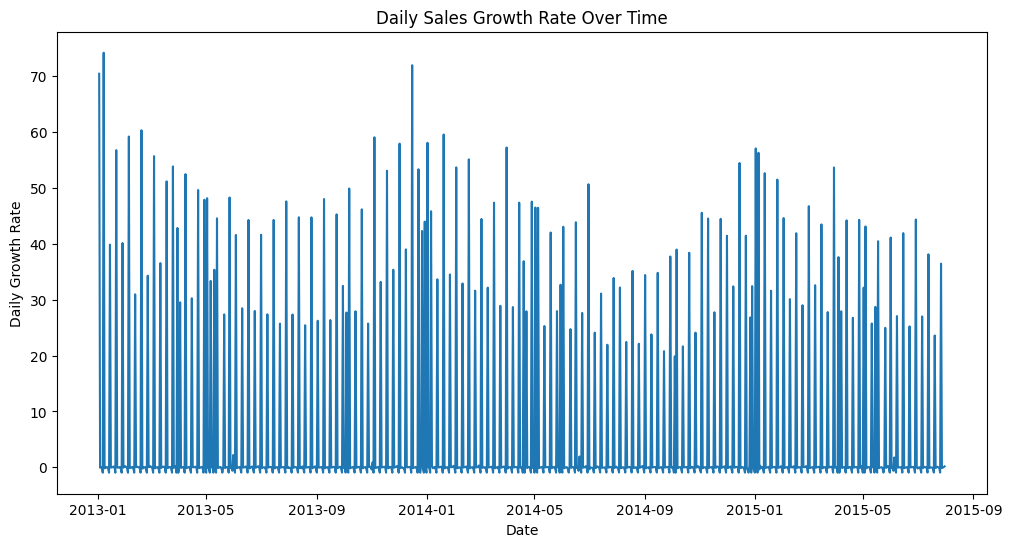

In [52]:
#  Visualize the Daily Growth Rate
# Sort data by date
daily_sales = daily_sales.sort_values('Date')

# Calculate daily growth rate
daily_sales['Daily_Growth_Rate'] = daily_sales['Sales'].pct_change()
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Daily_Growth_Rate', data=daily_sales)
plt.title('Daily Sales Growth Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Daily Growth Rate')
plt.show()

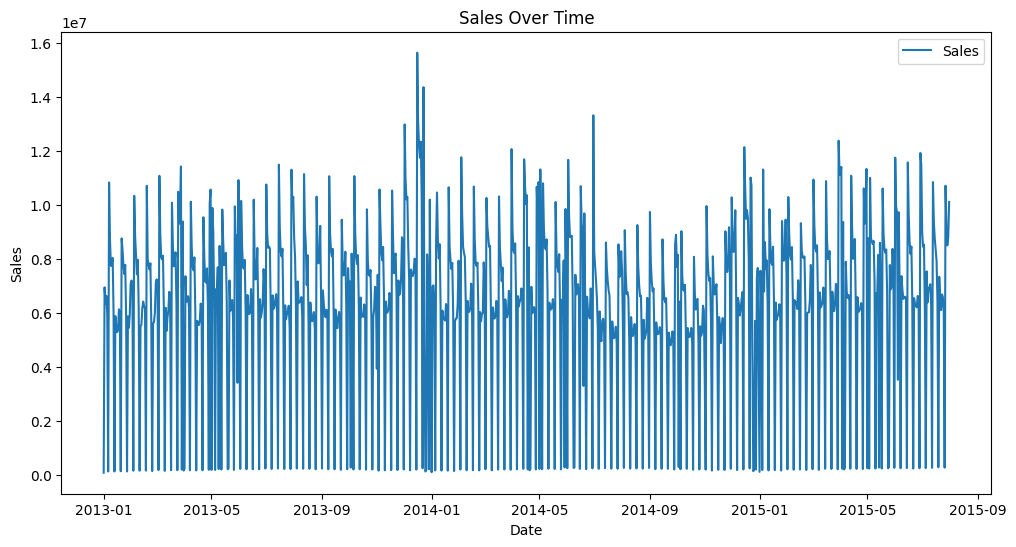

In [53]:
#Trend and Seasonality Analysis
plt.figure(figsize=(12, 6))
plt.plot(daily_sales['Date'], daily_sales['Sales'], label='Sales')
plt.title('Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()


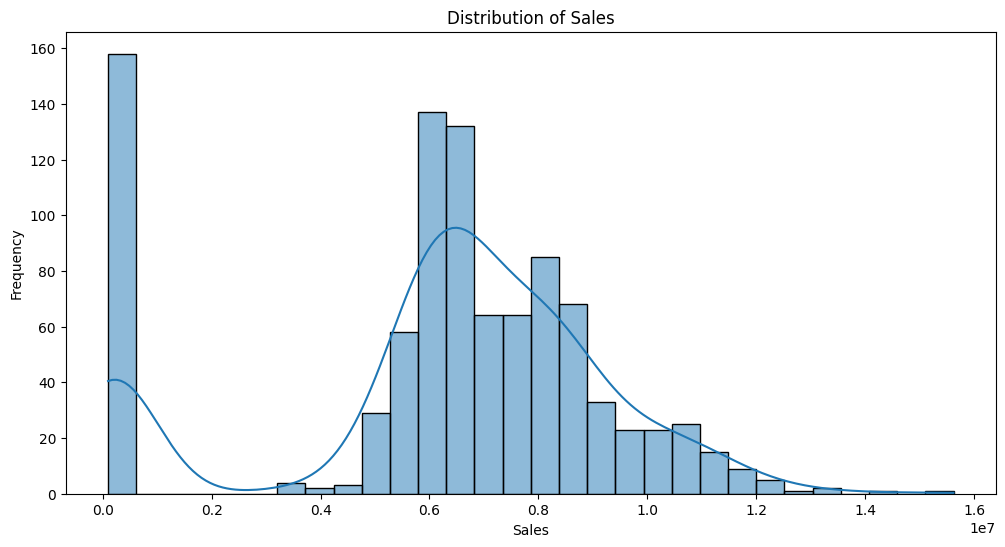

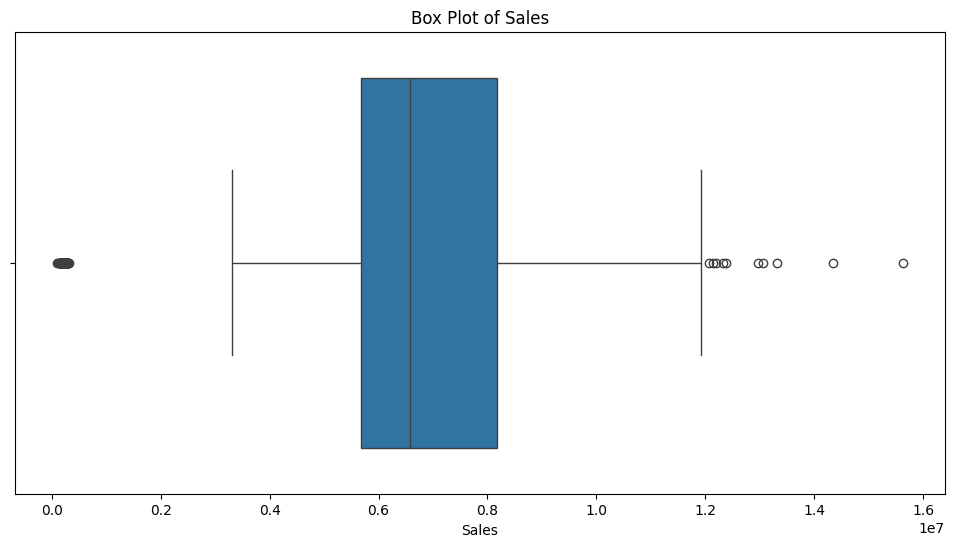

In [54]:
#Sales Distribution Analysis
plt.figure(figsize=(12, 6))
sns.histplot(daily_sales['Sales'], bins=30, kde=True)
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x=daily_sales['Sales'])
plt.title('Box Plot of Sales')
plt.xlabel('Sales')
plt.show()
